In [1]:
# Parameters
uid_list = None


# Template of  jupyter notebook for analysis of SAXS/WAXS/GiSAXS/GiWAXS

## Load package

In [2]:
#%matplotlib notebook
%matplotlib inline
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
T = True
F = False

## Define IO

In [3]:
inDir =  '/home/group/NSLSII_Data/SMI/2021_Cycle1/304841_Kim/300KW/'
#inDir = '/home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/raw_data/300KW/'


print('The input dir is: %s'%inDir)



The input dir is: /home/group/NSLSII_Data/SMI/2021_Cycle1/304841_Kim/300KW/


In [4]:
outDir = '/home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/'
outDir = create_fullpath(  outDir )
outDir = '/home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/'
outDir = create_fullpath(  outDir )
outDir_HDF =  create_dir(  'HDF_Results/', outDir )
outDir_PDF =  create_dir(  'PDF_Report/', outDir )

Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/HDF_Results/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/PDF_Report/  already exists


## Organize Data 
* the sorting method heavly relies on data acquisition strategy
* Currently, there is no general method for sorting

In [5]:
username_ = 'ABos'


flist = ls_dir( inDir, and_list=[  username_,  ], no_list=[  ])
#_, flists = sort_fnlist( flist,  cut_beg = -24, cut_end=-9, method = 'cut_from_end' ) #for waxs
flists = flist

#flists_clean = drop_xyz_float_filenames( flists, pattern_characters = ['_x', '_y', '_z', '_w' ] )
#flists_clean = drop_xyz_float_filenames( flists, pattern_characters = ['_x', '_w'  ] )
flists_clean = flist
Nf = len( flists)
print('There are %s files for user: %s in this run.'%(Nf, username_))

There are 324 files for user: ABos in this run.


In [6]:
# 70 samples * 3 position * 9 waxs angles * 3 inc_ang 
4*3*9*3,  4*3*9*3

(324, 324)

In [7]:
flist

array(['ABosc_2021C1_Dennis_S3_0.1000deg_waxsP45.50_x-30000.00_expt1s_sid00267814_000001_WAXS.tif',
       'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP45.50_x-29500.00_expt1s_sid00267816_000001_WAXS.tif',
       'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP19.50_x-50000.00_expt1s_sid00267601_000001_WAXS.tif',
       'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP45.50_x-29500.00_expt1s_sid00267817_000001_WAXS.tif',
       'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN19.50_x-24000.00_expt1s_sid00267887_000001_WAXS.tif',
       'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP19.50_x-30000.00_expt1s_sid00267778_000001_WAXS.tif',
       'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN19.50_x-38000.00_expt1s_sid00267714_000001_WAXS.tif',
       'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN06.50_x-24500.00_expt1s_sid00267902_000001_WAXS.tif',
       'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN32.50_x-39000.00_expt1s_sid00267691_000001_WAXS.tif',
       'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP26.00_x-50000.00_expt1s_sid00267610_000001_WAXS.tif',


In [8]:
flists_clean

array(['ABosc_2021C1_Dennis_S3_0.1000deg_waxsP45.50_x-30000.00_expt1s_sid00267814_000001_WAXS.tif',
       'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP45.50_x-29500.00_expt1s_sid00267816_000001_WAXS.tif',
       'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP19.50_x-50000.00_expt1s_sid00267601_000001_WAXS.tif',
       'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP45.50_x-29500.00_expt1s_sid00267817_000001_WAXS.tif',
       'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN19.50_x-24000.00_expt1s_sid00267887_000001_WAXS.tif',
       'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP19.50_x-30000.00_expt1s_sid00267778_000001_WAXS.tif',
       'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN19.50_x-38000.00_expt1s_sid00267714_000001_WAXS.tif',
       'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN06.50_x-24500.00_expt1s_sid00267902_000001_WAXS.tif',
       'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN32.50_x-39000.00_expt1s_sid00267691_000001_WAXS.tif',
       'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP26.00_x-50000.00_expt1s_sid00267610_000001_WAXS.tif',


### Using a two-layered dict to sort the files 

In [9]:
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py

In [10]:
#cut_pattern= r'(_waxs)'
cut_pattern= r'(_waxs)'
#cut_pattern= r'(_deg)'
sam_dict, sams = get_Unique_SamDict_from_list( flists, sam_list_clean=flists_clean, 
                                               cut_pattern= cut_pattern, starting_point=  0     )   
#ks =  sorted(list(sams.keys()))
ks =   sorted(list(sams.keys()))
N = len(ks)
print( 'There are %s samples.'%(N))

There are 12 samples.


In [11]:
ks

['ABosc_2021C1_Dennis_S1_0.0800deg',
 'ABosc_2021C1_Dennis_S1_0.1000deg',
 'ABosc_2021C1_Dennis_S1_0.1500deg',
 'ABosc_2021C1_Dennis_S2_0.0800deg',
 'ABosc_2021C1_Dennis_S2_0.1000deg',
 'ABosc_2021C1_Dennis_S2_0.1500deg',
 'ABosc_2021C1_Dennis_S3_0.0800deg',
 'ABosc_2021C1_Dennis_S3_0.1000deg',
 'ABosc_2021C1_Dennis_S3_0.1500deg',
 'ABosc_2021C1_Dennis_S4_0.0800deg',
 'ABosc_2021C1_Dennis_S4_0.1000deg',
 'ABosc_2021C1_Dennis_S4_0.1500deg']

In [12]:
# import shutil
# inDir
# outDirM = '/home/group/NSLSII_Data/SMI/2021_Cycle1/304841_Kim/Deleted/'



# delts= [     '2021C1_C28','2021C1_C29',
#                    '2021C1_C30','2021C1_C31','2021C1_C32', '2021C1_C33',
#                     '2021C1_D34','2021C1_D35','2021C1_D36', '2021C1_D37', ]
# probs = []
# for k in ks:
#     for d in delts:
#         if d in k:
#             probs.append( k )

    



# for p in probs:
#     fps = sam_dict[ p ] 
#     for fp in fps:
#         sid = int( fp[-24: - 16] )
#         if sid < 265110:
#             original = inDir + fp
#             target = outDirM + fp
#             print(fp)
#             shutil.move(original,target)

In [13]:
sams

{'ABosc_2021C1_Dennis_S3_0.1000deg': 27,
 'ABosc_2021C1_Dennis_S3_0.0800deg': 27,
 'ABosc_2021C1_Dennis_S1_0.0800deg': 27,
 'ABosc_2021C1_Dennis_S4_0.1000deg': 27,
 'ABosc_2021C1_Dennis_S2_0.1000deg': 27,
 'ABosc_2021C1_Dennis_S2_0.1500deg': 27,
 'ABosc_2021C1_Dennis_S4_0.0800deg': 27,
 'ABosc_2021C1_Dennis_S3_0.1500deg': 27,
 'ABosc_2021C1_Dennis_S2_0.0800deg': 27,
 'ABosc_2021C1_Dennis_S1_0.1500deg': 27,
 'ABosc_2021C1_Dennis_S4_0.1500deg': 27,
 'ABosc_2021C1_Dennis_S1_0.1000deg': 27}

 ## Create another layer of samples

In [14]:
Sam_dict = {}

for k in ks:
#for k in [ ks[0] ] :
    fdict, fl = sort_fnlist( sam_dict[k], pattern='_sid', lsid = 7, cut_beg = -24, cut_end=-16, method='cut_from_end' )
    if 'waxsN' in fl[0]:
        FL = fl[::-1]
    else:
        FL = fl
    Sam_dict[k + '_pos1'] = FL[::3]
    Sam_dict[k + '_pos2'] = FL[1::3]
    Sam_dict[k + '_pos3'] = FL[2::3]    
 
ks =   sorted(list(Sam_dict.keys()))
N = len(ks)
print( 'There are %s samples.'%(N))        
    

There are 36 samples.


In [15]:
 # 70 samples *  3 inc *  3 position   #9 angles

##  Load Mask if has one

In [16]:
#mask  =np.load( '/home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Mask/mask_waxs_2020C3_YG.npy')
#show_img(mask)
mask = None

## Define data analysis parameters and methods

### A GiWAXS

In [17]:
username = 'ABos'
beamline = 'SMI'
cycle='2021_C1'


geometry   =  'Reflection'
det_str =  'Pilatus300kw'

wav_m = 1E-10 * (12.398/16.1)
sdd_mm = 274.0
b_xy = [96,  1475 - 88  ]   #[ 88, 96  ]
bs_xy = [96, 1203]         #
incident_angle = 0
hotpixel_thres = 1e6
  
pargs_sc = dict( wav_m = wav_m, 
                sdd_mm = sdd_mm, 
                b_xy =b_xy, 
                bs_xy = bs_xy, 
                incident_angle = incident_angle,             
                det_str = det_str, 
                bs_kind = None, 
                useqx = True,
                geometry =  geometry,                
                username = username, 
                cycle =  cycle, 
                beamline = beamline, 
                outDir = outDir, )
              # mask = mask )
    

rot_angle_start = 0
rot_angle_step = 6.5     
## Setup the class
SC = SMI_Scattering( pargs_sc  )
 


### Methods

In [18]:
do_plot = T #True 
#do_inpait = True, make it True, the circular average does not use inpaited data 
do_show_plot = T
save_raw = F
do_qimg = F
do_ciravg = F
save_raw= F
check_stitch = F
do_stitch = F
do_Qciravg = F
show_Qciravg_roi = F 
do_Qciravg_sector = F   
show_Qciravg_sector = F 
do_Qqphi = F 
do_q_qphi = F
do_p_qphi = F  


if T:    
    ###########################
    #for GiWAXS
    ###########################  
    do_plot_raw = F # True
    check_stitch = F
    do_stitch = T
    do_plot_stich = F
    save_stitch_to_tiff = F
    do_Qciravg = T
    show_Qciravg_roi = F     
    do_Qciravg_sector =  F  
    show_Qciravg_sector = F    
    Qciravg_sector_angle_wid = 10 
    Qciravg_sector_angles = [  10,  30,  50, 70, 90    ]   
    
    do_Qqphi = F
    do_q_qphi = F
    do_p_qphi = F
 
    
#ThresN = 100000



In [19]:
sample_list = ks 

#sample_list =[  ks[ 18 ]  ]

sample_list =   ks[:]    
#sample_list = ks   #use a dummy papemill to run this
print( len(sample_list))
print( sample_list )

36
['ABosc_2021C1_Dennis_S1_0.0800deg_pos1', 'ABosc_2021C1_Dennis_S1_0.0800deg_pos2', 'ABosc_2021C1_Dennis_S1_0.0800deg_pos3', 'ABosc_2021C1_Dennis_S1_0.1000deg_pos1', 'ABosc_2021C1_Dennis_S1_0.1000deg_pos2', 'ABosc_2021C1_Dennis_S1_0.1000deg_pos3', 'ABosc_2021C1_Dennis_S1_0.1500deg_pos1', 'ABosc_2021C1_Dennis_S1_0.1500deg_pos2', 'ABosc_2021C1_Dennis_S1_0.1500deg_pos3', 'ABosc_2021C1_Dennis_S2_0.0800deg_pos1', 'ABosc_2021C1_Dennis_S2_0.0800deg_pos2', 'ABosc_2021C1_Dennis_S2_0.0800deg_pos3', 'ABosc_2021C1_Dennis_S2_0.1000deg_pos1', 'ABosc_2021C1_Dennis_S2_0.1000deg_pos2', 'ABosc_2021C1_Dennis_S2_0.1000deg_pos3', 'ABosc_2021C1_Dennis_S2_0.1500deg_pos1', 'ABosc_2021C1_Dennis_S2_0.1500deg_pos2', 'ABosc_2021C1_Dennis_S2_0.1500deg_pos3', 'ABosc_2021C1_Dennis_S3_0.0800deg_pos1', 'ABosc_2021C1_Dennis_S3_0.0800deg_pos2', 'ABosc_2021C1_Dennis_S3_0.0800deg_pos3', 'ABosc_2021C1_Dennis_S3_0.1000deg_pos1', 'ABosc_2021C1_Dennis_S3_0.1000deg_pos2', 'ABosc_2021C1_Dennis_S3_0.1000deg_pos3', 'ABosc_2021C

In [20]:
sample_list

['ABosc_2021C1_Dennis_S1_0.0800deg_pos1',
 'ABosc_2021C1_Dennis_S1_0.0800deg_pos2',
 'ABosc_2021C1_Dennis_S1_0.0800deg_pos3',
 'ABosc_2021C1_Dennis_S1_0.1000deg_pos1',
 'ABosc_2021C1_Dennis_S1_0.1000deg_pos2',
 'ABosc_2021C1_Dennis_S1_0.1000deg_pos3',
 'ABosc_2021C1_Dennis_S1_0.1500deg_pos1',
 'ABosc_2021C1_Dennis_S1_0.1500deg_pos2',
 'ABosc_2021C1_Dennis_S1_0.1500deg_pos3',
 'ABosc_2021C1_Dennis_S2_0.0800deg_pos1',
 'ABosc_2021C1_Dennis_S2_0.0800deg_pos2',
 'ABosc_2021C1_Dennis_S2_0.0800deg_pos3',
 'ABosc_2021C1_Dennis_S2_0.1000deg_pos1',
 'ABosc_2021C1_Dennis_S2_0.1000deg_pos2',
 'ABosc_2021C1_Dennis_S2_0.1000deg_pos3',
 'ABosc_2021C1_Dennis_S2_0.1500deg_pos1',
 'ABosc_2021C1_Dennis_S2_0.1500deg_pos2',
 'ABosc_2021C1_Dennis_S2_0.1500deg_pos3',
 'ABosc_2021C1_Dennis_S3_0.0800deg_pos1',
 'ABosc_2021C1_Dennis_S3_0.0800deg_pos2',
 'ABosc_2021C1_Dennis_S3_0.0800deg_pos3',
 'ABosc_2021C1_Dennis_S3_0.1000deg_pos1',
 'ABosc_2021C1_Dennis_S3_0.1000deg_pos2',
 'ABosc_2021C1_Dennis_S3_0.1000deg

In [21]:
 len(ks)

36

In [22]:
#ks[450:]

In [23]:
 Sam_dict[sample_list[ 0 ]], len( Sam_dict[sample_list[ 0 ]] )

(['ABosc_2021C1_Dennis_S1_0.0800deg_waxsP00.00_x-50000.00_expt1s_sid00267574_000001_WAXS.tif',
  'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP06.50_x-50000.00_expt1s_sid00267583_000001_WAXS.tif',
  'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP13.00_x-50000.00_expt1s_sid00267592_000001_WAXS.tif',
  'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP19.50_x-50000.00_expt1s_sid00267601_000001_WAXS.tif',
  'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP26.00_x-50000.00_expt1s_sid00267610_000001_WAXS.tif',
  'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP32.50_x-50000.00_expt1s_sid00267619_000001_WAXS.tif',
  'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP39.00_x-50000.00_expt1s_sid00267628_000001_WAXS.tif',
  'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP45.50_x-50000.00_expt1s_sid00267637_000001_WAXS.tif',
  'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP52.00_x-50000.00_expt1s_sid00267646_000001_WAXS.tif'],
 9)

In [24]:
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Pipeline_Funcs.py

# Run the data analysis

The sample is: ABosc_2021C1_Dennis_S1_0.0800deg_pos1.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S1_0.0800deg_waxsP00.00_x-50000.00_expt1s_sid00267574_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP06.50_x-50000.00_expt1s_sid00267583_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP13.00_x-50000.00_expt1s_sid00267592_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP19.50_x-50000.00_expt1s_sid00267601_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP26.00_x-50000.00_expt1s_sid00267610_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP32.50_x-50000.00_expt1s_sid00267619_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP39.00_x-50000.00_expt1s_sid00267628_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP45.50_x-50000.00_expt1s_sid00267637_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP52.00_x-50000.00_expt1s_sid00267646_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S1_0.0800deg_pos1.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S1_0.0800deg_pos2.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S1_0.0800deg_waxsP00.00_x-49500.00_expt1s_sid00267577_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP06.50_x-49500.00_expt1s_sid00267586_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP13.00_x-49500.00_expt1s_sid00267595_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP19.50_x-49500.00_expt1s_sid00267604_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP26.00_x-49500.00_expt1s_sid00267613_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP32.50_x-49500.00_expt1s_sid00267622_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP39.00_x-49500.00_expt1s_sid00267631_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP45.50_x-49500.00_expt1s_sid00267640_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP52.00_x-49500.00_expt1s_sid00267649_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S1_0.0800deg_pos2.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S1_0.0800deg_pos3.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S1_0.0800deg_waxsP00.00_x-49000.00_expt1s_sid00267580_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP06.50_x-49000.00_expt1s_sid00267589_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP13.00_x-49000.00_expt1s_sid00267598_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP19.50_x-49000.00_expt1s_sid00267607_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP26.00_x-49000.00_expt1s_sid00267616_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP32.50_x-49000.00_expt1s_sid00267625_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP39.00_x-49000.00_expt1s_sid00267634_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP45.50_x-49000.00_expt1s_sid00267643_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.0800deg_waxsP52.00_x-49000.00_expt1s_sid00267652_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S1_0.0800deg_pos3.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S1_0.1000deg_pos1.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S1_0.1000deg_waxsP00.00_x-50000.00_expt1s_sid00267575_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP06.50_x-50000.00_expt1s_sid00267584_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP13.00_x-50000.00_expt1s_sid00267593_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP19.50_x-50000.00_expt1s_sid00267602_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP26.00_x-50000.00_expt1s_sid00267611_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP32.50_x-50000.00_expt1s_sid00267620_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP39.00_x-50000.00_expt1s_sid00267629_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP45.50_x-50000.00_expt1s_sid00267638_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP52.00_x-50000.00_expt1s_sid00267647_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S1_0.1000deg_pos1.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S1_0.1000deg_pos2.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S1_0.1000deg_waxsP00.00_x-49500.00_expt1s_sid00267578_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP06.50_x-49500.00_expt1s_sid00267587_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP13.00_x-49500.00_expt1s_sid00267596_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP19.50_x-49500.00_expt1s_sid00267605_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP26.00_x-49500.00_expt1s_sid00267614_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP32.50_x-49500.00_expt1s_sid00267623_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP39.00_x-49500.00_expt1s_sid00267632_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP45.50_x-49500.00_expt1s_sid00267641_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP52.00_x-49500.00_expt1s_sid00267650_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S1_0.1000deg_pos2.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S1_0.1000deg_pos3.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S1_0.1000deg_waxsP00.00_x-49000.00_expt1s_sid00267581_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP06.50_x-49000.00_expt1s_sid00267590_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP13.00_x-49000.00_expt1s_sid00267599_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP19.50_x-49000.00_expt1s_sid00267608_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP26.00_x-49000.00_expt1s_sid00267617_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP32.50_x-49000.00_expt1s_sid00267626_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP39.00_x-49000.00_expt1s_sid00267635_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP45.50_x-49000.00_expt1s_sid00267644_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1000deg_waxsP52.00_x-49000.00_expt1s_sid00267653_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S1_0.1000deg_pos3.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S1_0.1500deg_pos1.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S1_0.1500deg_waxsP00.00_x-50000.00_expt1s_sid00267576_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP06.50_x-50000.00_expt1s_sid00267585_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP13.00_x-50000.00_expt1s_sid00267594_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP19.50_x-50000.00_expt1s_sid00267603_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP26.00_x-50000.00_expt1s_sid00267612_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP32.50_x-50000.00_expt1s_sid00267621_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP39.00_x-50000.00_expt1s_sid00267630_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP45.50_x-50000.00_expt1s_sid00267639_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP52.00_x-50000.00_expt1s_sid00267648_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S1_0.1500deg_pos1.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S1_0.1500deg_pos2.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S1_0.1500deg_waxsP00.00_x-49500.00_expt1s_sid00267579_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP06.50_x-49500.00_expt1s_sid00267588_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP13.00_x-49500.00_expt1s_sid00267597_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP19.50_x-49500.00_expt1s_sid00267606_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP26.00_x-49500.00_expt1s_sid00267615_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP32.50_x-49500.00_expt1s_sid00267624_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP39.00_x-49500.00_expt1s_sid00267633_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP45.50_x-49500.00_expt1s_sid00267642_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP52.00_x-49500.00_expt1s_sid00267651_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S1_0.1500deg_pos2.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S1_0.1500deg_pos3.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S1_0.1500deg_waxsP00.00_x-49000.00_expt1s_sid00267582_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP06.50_x-49000.00_expt1s_sid00267591_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP13.00_x-49000.00_expt1s_sid00267600_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP19.50_x-49000.00_expt1s_sid00267609_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP26.00_x-49000.00_expt1s_sid00267618_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP32.50_x-49000.00_expt1s_sid00267627_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP39.00_x-49000.00_expt1s_sid00267636_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP45.50_x-49000.00_expt1s_sid00267645_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S1_0.1500deg_waxsP52.00_x-49000.00_expt1s_sid00267654_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S1_0.1500deg_pos3.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S2_0.0800deg_pos1.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S2_0.0800deg_waxsN00.00_x-38000.00_expt1s_sid00267740_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN06.50_x-38000.00_expt1s_sid00267731_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN13.00_x-38000.00_expt1s_sid00267722_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN19.50_x-38000.00_expt1s_sid00267713_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN26.00_x-38000.00_expt1s_sid00267704_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN32.50_x-38000.00_expt1s_sid00267695_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN39.00_x-38000.00_expt1s_sid00267686_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN45.50_x-38000.00_expt1s_sid00267677_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN52.00_x-38000.00_expt1s_sid00267668_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S2_0.0800deg_pos1.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S2_0.0800deg_pos2.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S2_0.0800deg_waxsN00.00_x-38500.00_expt1s_sid00267737_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN06.50_x-38500.00_expt1s_sid00267728_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN13.00_x-38500.00_expt1s_sid00267719_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN19.50_x-38500.00_expt1s_sid00267710_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN26.00_x-38500.00_expt1s_sid00267701_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN32.50_x-38500.00_expt1s_sid00267692_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN39.00_x-38500.00_expt1s_sid00267683_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN45.50_x-38500.00_expt1s_sid00267674_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN52.00_x-38500.00_expt1s_sid00267665_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S2_0.0800deg_pos2.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S2_0.0800deg_pos3.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S2_0.0800deg_waxsN00.00_x-39000.00_expt1s_sid00267734_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN06.50_x-39000.00_expt1s_sid00267725_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN13.00_x-39000.00_expt1s_sid00267716_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN19.50_x-39000.00_expt1s_sid00267707_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN26.00_x-39000.00_expt1s_sid00267698_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN32.50_x-39000.00_expt1s_sid00267689_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN39.00_x-39000.00_expt1s_sid00267680_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN45.50_x-39000.00_expt1s_sid00267671_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.0800deg_waxsN52.00_x-39000.00_expt1s_sid00267662_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S2_0.0800deg_pos3.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S2_0.1000deg_pos1.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S2_0.1000deg_waxsN00.00_x-38000.00_expt1s_sid00267741_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN06.50_x-38000.00_expt1s_sid00267732_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN13.00_x-38000.00_expt1s_sid00267723_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN19.50_x-38000.00_expt1s_sid00267714_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN26.00_x-38000.00_expt1s_sid00267705_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN32.50_x-38000.00_expt1s_sid00267696_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN39.00_x-38000.00_expt1s_sid00267687_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN45.50_x-38000.00_expt1s_sid00267678_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN52.00_x-38000.00_expt1s_sid00267669_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S2_0.1000deg_pos1.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S2_0.1000deg_pos2.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S2_0.1000deg_waxsN00.00_x-38500.00_expt1s_sid00267738_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN06.50_x-38500.00_expt1s_sid00267729_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN13.00_x-38500.00_expt1s_sid00267720_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN19.50_x-38500.00_expt1s_sid00267711_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN26.00_x-38500.00_expt1s_sid00267702_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN32.50_x-38500.00_expt1s_sid00267693_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN39.00_x-38500.00_expt1s_sid00267684_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN45.50_x-38500.00_expt1s_sid00267675_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN52.00_x-38500.00_expt1s_sid00267666_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S2_0.1000deg_pos2.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S2_0.1000deg_pos3.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S2_0.1000deg_waxsN00.00_x-39000.00_expt1s_sid00267735_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN06.50_x-39000.00_expt1s_sid00267726_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN13.00_x-39000.00_expt1s_sid00267717_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN19.50_x-39000.00_expt1s_sid00267708_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN26.00_x-39000.00_expt1s_sid00267699_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN32.50_x-39000.00_expt1s_sid00267690_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN39.00_x-39000.00_expt1s_sid00267681_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN45.50_x-39000.00_expt1s_sid00267672_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1000deg_waxsN52.00_x-39000.00_expt1s_sid00267663_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S2_0.1000deg_pos3.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S2_0.1500deg_pos1.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S2_0.1500deg_waxsN00.00_x-38000.00_expt1s_sid00267742_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN06.50_x-38000.00_expt1s_sid00267733_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN13.00_x-38000.00_expt1s_sid00267724_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN19.50_x-38000.00_expt1s_sid00267715_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN26.00_x-38000.00_expt1s_sid00267706_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN32.50_x-38000.00_expt1s_sid00267697_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN39.00_x-38000.00_expt1s_sid00267688_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN45.50_x-38000.00_expt1s_sid00267679_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN52.00_x-38000.00_expt1s_sid00267670_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S2_0.1500deg_pos1.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S2_0.1500deg_pos2.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S2_0.1500deg_waxsN00.00_x-38500.00_expt1s_sid00267739_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN06.50_x-38500.00_expt1s_sid00267730_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN13.00_x-38500.00_expt1s_sid00267721_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN19.50_x-38500.00_expt1s_sid00267712_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN26.00_x-38500.00_expt1s_sid00267703_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN32.50_x-38500.00_expt1s_sid00267694_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN39.00_x-38500.00_expt1s_sid00267685_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN45.50_x-38500.00_expt1s_sid00267676_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN52.00_x-38500.00_expt1s_sid00267667_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S2_0.1500deg_pos2.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S2_0.1500deg_pos3.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S2_0.1500deg_waxsN00.00_x-39000.00_expt1s_sid00267736_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN06.50_x-39000.00_expt1s_sid00267727_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN13.00_x-39000.00_expt1s_sid00267718_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN19.50_x-39000.00_expt1s_sid00267709_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN26.00_x-39000.00_expt1s_sid00267700_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN32.50_x-39000.00_expt1s_sid00267691_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN39.00_x-39000.00_expt1s_sid00267682_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN45.50_x-39000.00_expt1s_sid00267673_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S2_0.1500deg_waxsN52.00_x-39000.00_expt1s_sid00267664_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S2_0.1500deg_pos3.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S3_0.0800deg_pos1.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S3_0.0800deg_waxsP00.00_x-30000.00_expt1s_sid00267750_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP06.50_x-30000.00_expt1s_sid00267759_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP13.00_x-30000.00_expt1s_sid00267768_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP19.50_x-30000.00_expt1s_sid00267777_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP26.00_x-30000.00_expt1s_sid00267786_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP32.50_x-30000.00_expt1s_sid00267795_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP39.00_x-30000.00_expt1s_sid00267804_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP45.50_x-30000.00_expt1s_sid00267813_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP52.00_x-30000.00_expt1s_sid00267822_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S3_0.0800deg_pos1.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S3_0.0800deg_pos2.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S3_0.0800deg_waxsP00.00_x-29500.00_expt1s_sid00267753_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP06.50_x-29500.00_expt1s_sid00267762_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP13.00_x-29500.00_expt1s_sid00267771_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP19.50_x-29500.00_expt1s_sid00267780_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP26.00_x-29500.00_expt1s_sid00267789_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP32.50_x-29500.00_expt1s_sid00267798_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP39.00_x-29500.00_expt1s_sid00267807_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP45.50_x-29500.00_expt1s_sid00267816_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP52.00_x-29500.00_expt1s_sid00267825_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S3_0.0800deg_pos2.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S3_0.0800deg_pos3.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S3_0.0800deg_waxsP00.00_x-29000.00_expt1s_sid00267756_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP06.50_x-29000.00_expt1s_sid00267765_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP13.00_x-29000.00_expt1s_sid00267774_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP19.50_x-29000.00_expt1s_sid00267783_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP26.00_x-29000.00_expt1s_sid00267792_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP32.50_x-29000.00_expt1s_sid00267801_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP39.00_x-29000.00_expt1s_sid00267810_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP45.50_x-29000.00_expt1s_sid00267819_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.0800deg_waxsP52.00_x-29000.00_expt1s_sid00267828_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S3_0.0800deg_pos3.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S3_0.1000deg_pos1.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S3_0.1000deg_waxsP00.00_x-30000.00_expt1s_sid00267751_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP06.50_x-30000.00_expt1s_sid00267760_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP13.00_x-30000.00_expt1s_sid00267769_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP19.50_x-30000.00_expt1s_sid00267778_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP26.00_x-30000.00_expt1s_sid00267787_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP32.50_x-30000.00_expt1s_sid00267796_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP39.00_x-30000.00_expt1s_sid00267805_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP45.50_x-30000.00_expt1s_sid00267814_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP52.00_x-30000.00_expt1s_sid00267823_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S3_0.1000deg_pos1.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S3_0.1000deg_pos2.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S3_0.1000deg_waxsP00.00_x-29500.00_expt1s_sid00267754_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP06.50_x-29500.00_expt1s_sid00267763_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP13.00_x-29500.00_expt1s_sid00267772_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP19.50_x-29500.00_expt1s_sid00267781_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP26.00_x-29500.00_expt1s_sid00267790_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP32.50_x-29500.00_expt1s_sid00267799_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP39.00_x-29500.00_expt1s_sid00267808_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP45.50_x-29500.00_expt1s_sid00267817_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP52.00_x-29500.00_expt1s_sid00267826_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S3_0.1000deg_pos2.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S3_0.1000deg_pos3.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S3_0.1000deg_waxsP00.00_x-29000.00_expt1s_sid00267757_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP06.50_x-29000.00_expt1s_sid00267766_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP13.00_x-29000.00_expt1s_sid00267775_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP19.50_x-29000.00_expt1s_sid00267784_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP26.00_x-29000.00_expt1s_sid00267793_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP32.50_x-29000.00_expt1s_sid00267802_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP39.00_x-29000.00_expt1s_sid00267811_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP45.50_x-29000.00_expt1s_sid00267820_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1000deg_waxsP52.00_x-29000.00_expt1s_sid00267829_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S3_0.1000deg_pos3.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S3_0.1500deg_pos1.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S3_0.1500deg_waxsP00.00_x-30000.00_expt1s_sid00267752_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP06.50_x-30000.00_expt1s_sid00267761_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP13.00_x-30000.00_expt1s_sid00267770_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP19.50_x-30000.00_expt1s_sid00267779_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP26.00_x-30000.00_expt1s_sid00267788_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP32.50_x-30000.00_expt1s_sid00267797_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP39.00_x-30000.00_expt1s_sid00267806_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP45.50_x-30000.00_expt1s_sid00267815_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP52.00_x-30000.00_expt1s_sid00267824_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S3_0.1500deg_pos1.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S3_0.1500deg_pos2.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S3_0.1500deg_waxsP00.00_x-29500.00_expt1s_sid00267755_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP06.50_x-29500.00_expt1s_sid00267764_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP13.00_x-29500.00_expt1s_sid00267773_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP19.50_x-29500.00_expt1s_sid00267782_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP26.00_x-29500.00_expt1s_sid00267791_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP32.50_x-29500.00_expt1s_sid00267800_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP39.00_x-29500.00_expt1s_sid00267809_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP45.50_x-29500.00_expt1s_sid00267818_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP52.00_x-29500.00_expt1s_sid00267827_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S3_0.1500deg_pos2.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S3_0.1500deg_pos3.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S3_0.1500deg_waxsP00.00_x-29000.00_expt1s_sid00267758_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP06.50_x-29000.00_expt1s_sid00267767_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP13.00_x-29000.00_expt1s_sid00267776_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP19.50_x-29000.00_expt1s_sid00267785_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP26.00_x-29000.00_expt1s_sid00267794_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP32.50_x-29000.00_expt1s_sid00267803_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP39.00_x-29000.00_expt1s_sid00267812_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP45.50_x-29000.00_expt1s_sid00267821_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S3_0.1500deg_waxsP52.00_x-29000.00_expt1s_sid00267830_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S3_0.1500deg_pos3.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S4_0.0800deg_pos1.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S4_0.0800deg_waxsN00.00_x-23500.00_expt1s_sid00267916_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN06.50_x-23500.00_expt1s_sid00267907_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN13.00_x-23500.00_expt1s_sid00267898_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN19.50_x-23500.00_expt1s_sid00267889_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN26.00_x-23500.00_expt1s_sid00267880_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN32.50_x-23500.00_expt1s_sid00267871_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN39.00_x-23500.00_expt1s_sid00267862_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN45.50_x-23500.00_expt1s_sid00267853_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN52.00_x-23500.00_expt1s_sid00267844_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S4_0.0800deg_pos1.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S4_0.0800deg_pos2.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S4_0.0800deg_waxsN00.00_x-24000.00_expt1s_sid00267913_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN06.50_x-24000.00_expt1s_sid00267904_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN13.00_x-24000.00_expt1s_sid00267895_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN19.50_x-24000.00_expt1s_sid00267886_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN26.00_x-24000.00_expt1s_sid00267877_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN32.50_x-24000.00_expt1s_sid00267868_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN39.00_x-24000.00_expt1s_sid00267859_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN45.50_x-24000.00_expt1s_sid00267850_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN52.00_x-24000.00_expt1s_sid00267841_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S4_0.0800deg_pos2.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S4_0.0800deg_pos3.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S4_0.0800deg_waxsN00.00_x-24500.00_expt1s_sid00267910_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN06.50_x-24500.00_expt1s_sid00267901_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN13.00_x-24500.00_expt1s_sid00267892_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN19.50_x-24500.00_expt1s_sid00267883_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN26.00_x-24500.00_expt1s_sid00267874_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN32.50_x-24500.00_expt1s_sid00267865_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN39.00_x-24500.00_expt1s_sid00267856_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN45.50_x-24500.00_expt1s_sid00267847_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.0800deg_waxsN52.00_x-24500.00_expt1s_sid00267838_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S4_0.0800deg_pos3.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S4_0.1000deg_pos1.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S4_0.1000deg_waxsN00.00_x-23500.00_expt1s_sid00267917_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN06.50_x-23500.00_expt1s_sid00267908_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN13.00_x-23500.00_expt1s_sid00267899_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN19.50_x-23500.00_expt1s_sid00267890_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN26.00_x-23500.00_expt1s_sid00267881_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN32.50_x-23500.00_expt1s_sid00267872_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN39.00_x-23500.00_expt1s_sid00267863_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN45.50_x-23500.00_expt1s_sid00267854_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN52.00_x-23500.00_expt1s_sid00267845_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S4_0.1000deg_pos1.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S4_0.1000deg_pos2.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S4_0.1000deg_waxsN00.00_x-24000.00_expt1s_sid00267914_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN06.50_x-24000.00_expt1s_sid00267905_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN13.00_x-24000.00_expt1s_sid00267896_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN19.50_x-24000.00_expt1s_sid00267887_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN26.00_x-24000.00_expt1s_sid00267878_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN32.50_x-24000.00_expt1s_sid00267869_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN39.00_x-24000.00_expt1s_sid00267860_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN45.50_x-24000.00_expt1s_sid00267851_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN52.00_x-24000.00_expt1s_sid00267842_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S4_0.1000deg_pos2.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S4_0.1000deg_pos3.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S4_0.1000deg_waxsN00.00_x-24500.00_expt1s_sid00267911_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN06.50_x-24500.00_expt1s_sid00267902_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN13.00_x-24500.00_expt1s_sid00267893_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN19.50_x-24500.00_expt1s_sid00267884_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN26.00_x-24500.00_expt1s_sid00267875_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN32.50_x-24500.00_expt1s_sid00267866_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN39.00_x-24500.00_expt1s_sid00267857_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN45.50_x-24500.00_expt1s_sid00267848_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1000deg_waxsN52.00_x-24500.00_expt1s_sid00267839_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S4_0.1000deg_pos3.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S4_0.1500deg_pos1.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S4_0.1500deg_waxsN00.00_x-23500.00_expt1s_sid00267918_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN06.50_x-23500.00_expt1s_sid00267909_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN13.00_x-23500.00_expt1s_sid00267900_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN19.50_x-23500.00_expt1s_sid00267891_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN26.00_x-23500.00_expt1s_sid00267882_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN32.50_x-23500.00_expt1s_sid00267873_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN39.00_x-23500.00_expt1s_sid00267864_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN45.50_x-23500.00_expt1s_sid00267855_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN52.00_x-23500.00_expt1s_sid00267846_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S4_0.1500deg_pos1.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S4_0.1500deg_pos2.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S4_0.1500deg_waxsN00.00_x-24000.00_expt1s_sid00267915_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN06.50_x-24000.00_expt1s_sid00267906_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN13.00_x-24000.00_expt1s_sid00267897_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN19.50_x-24000.00_expt1s_sid00267888_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN26.00_x-24000.00_expt1s_sid00267879_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN32.50_x-24000.00_expt1s_sid00267870_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN39.00_x-24000.00_expt1s_sid00267861_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN45.50_x-24000.00_expt1s_sid00267852_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN52.00_x-24000.00_expt1s_sid00267843_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S4_0.1500deg_pos2.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


The sample is: ABosc_2021C1_Dennis_S4_0.1500deg_pos3.
The filelist for this sample is: ['ABosc_2021C1_Dennis_S4_0.1500deg_waxsN00.00_x-24500.00_expt1s_sid00267912_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN06.50_x-24500.00_expt1s_sid00267903_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN13.00_x-24500.00_expt1s_sid00267894_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN19.50_x-24500.00_expt1s_sid00267885_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN26.00_x-24500.00_expt1s_sid00267876_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN32.50_x-24500.00_expt1s_sid00267867_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN39.00_x-24500.00_expt1s_sid00267858_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN45.50_x-24500.00_expt1s_sid00267849_000001_WAXS.tif', 'ABosc_2021C1_Dennis_S4_0.1500deg_waxsN52.00_x-24500.00_expt1s_sid00267840_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5 -26.  -32.5 -39.  -45.5 

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:825: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_ABosc_2021C1_Dennis_S4_0.1500deg_pos3.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/ABos/Results/GIWAXS/Cir_Avg/


Done


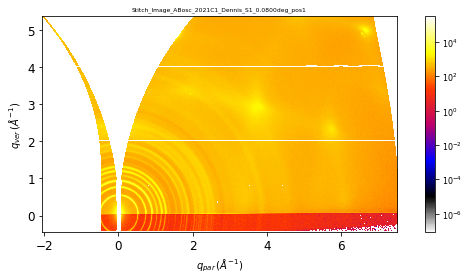

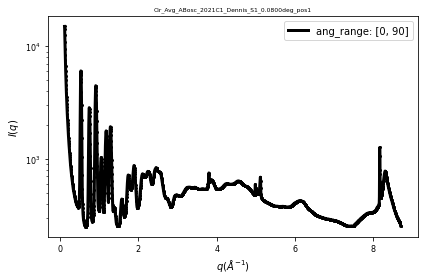

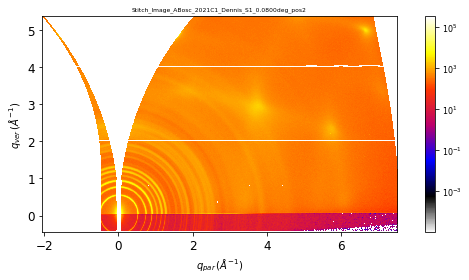

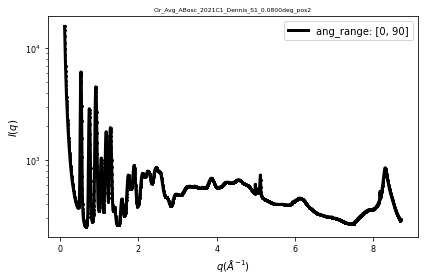

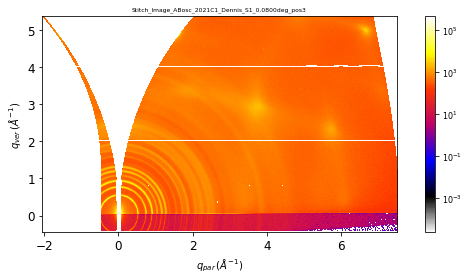

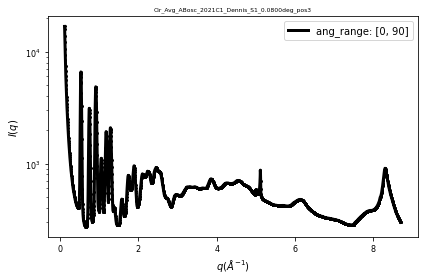

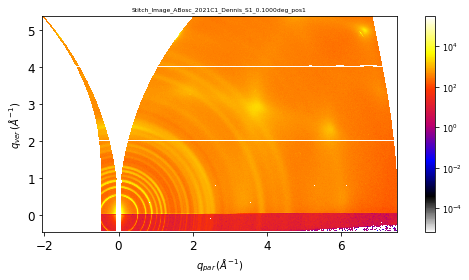

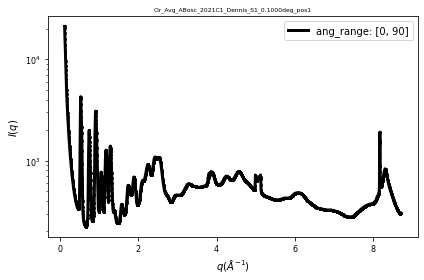

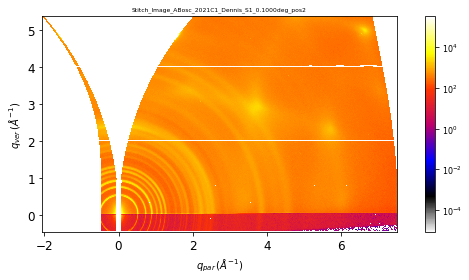

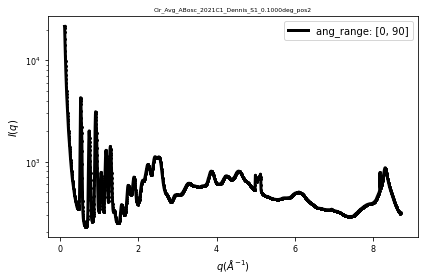

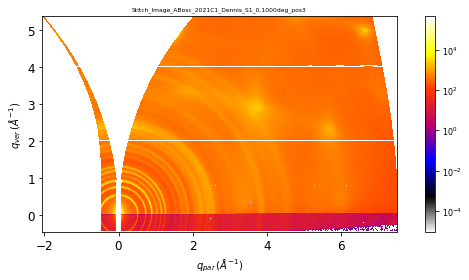

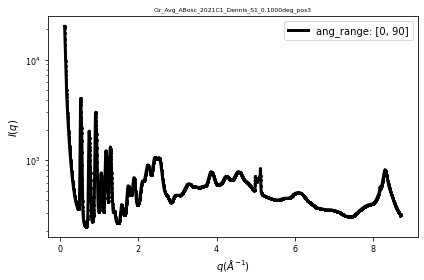

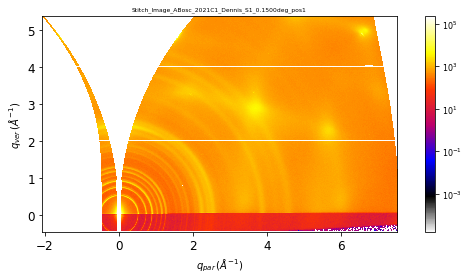

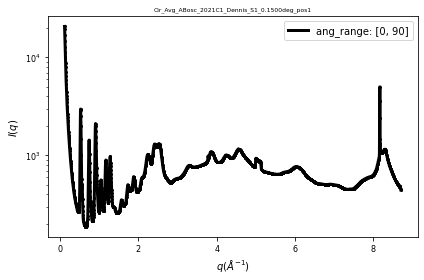

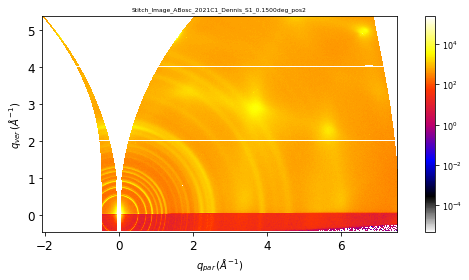

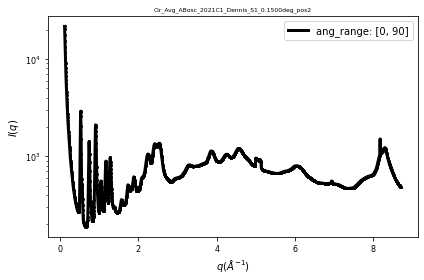

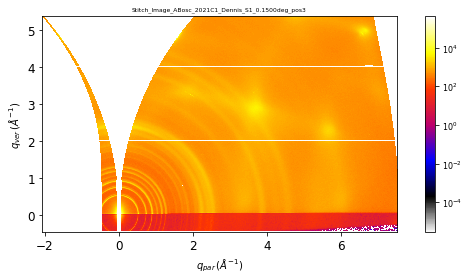

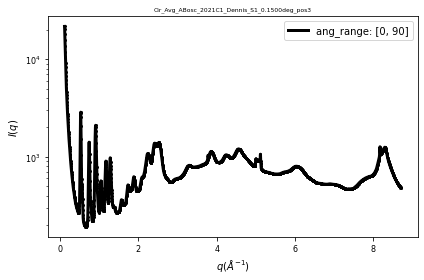

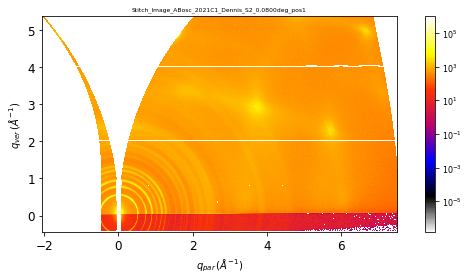

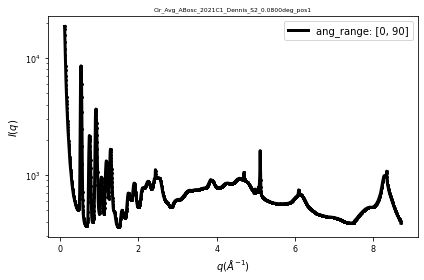

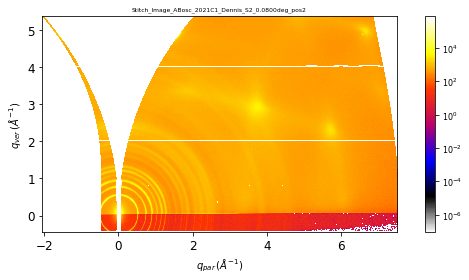

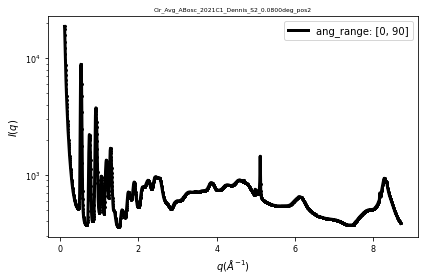

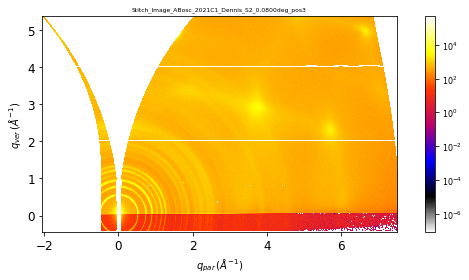

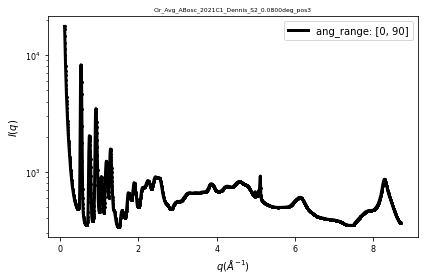

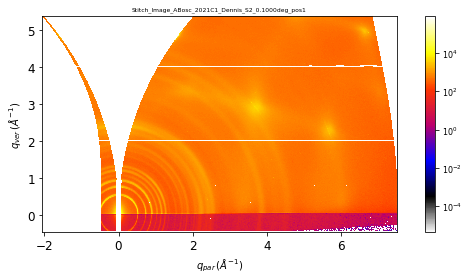

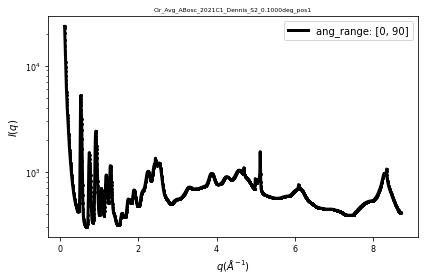

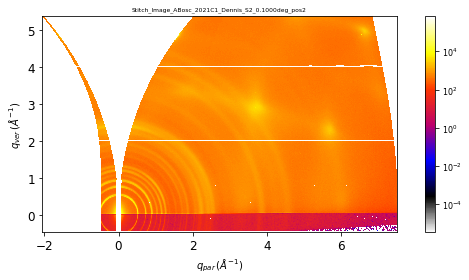

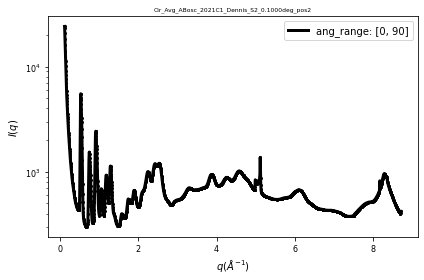

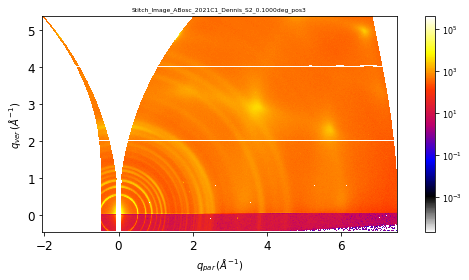

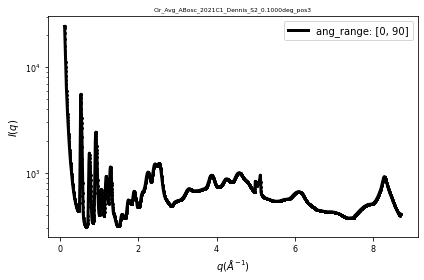

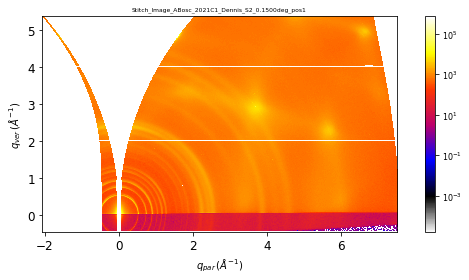

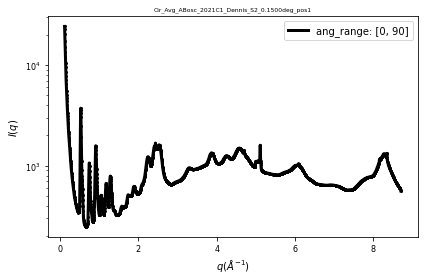

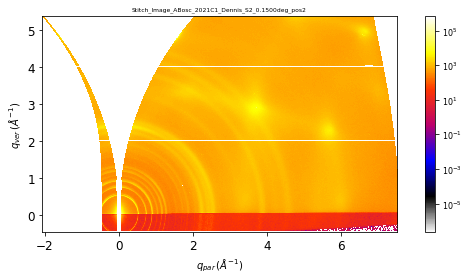

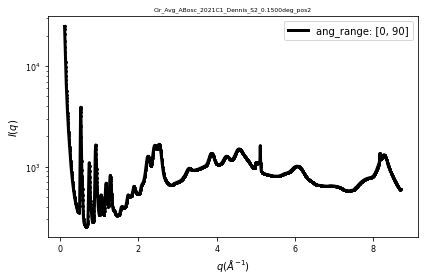

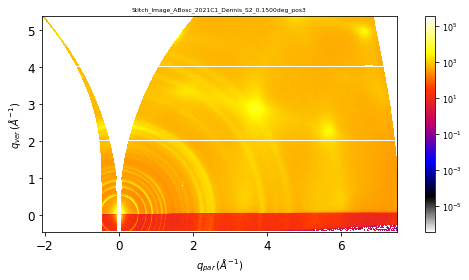

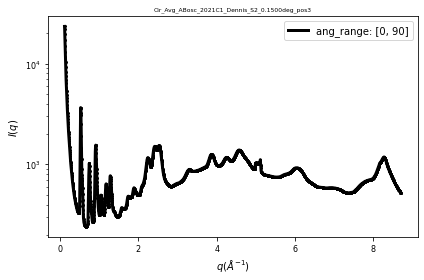

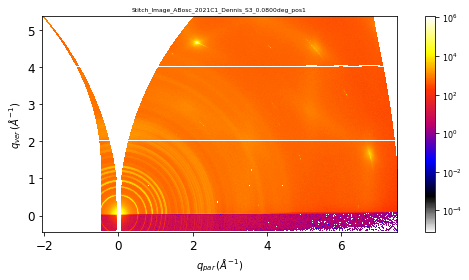

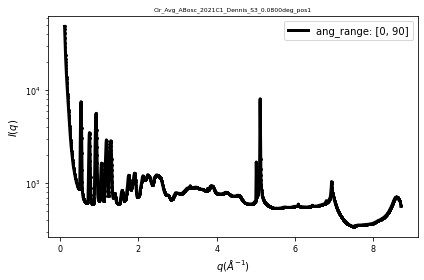

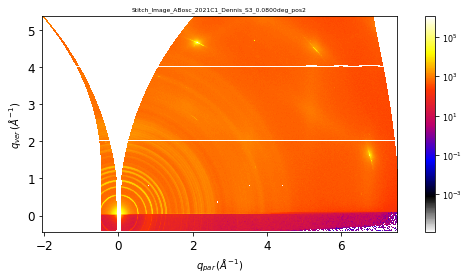

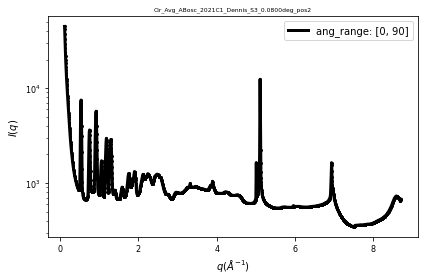

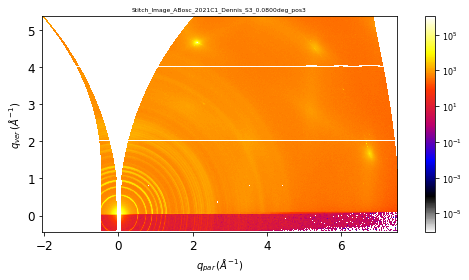

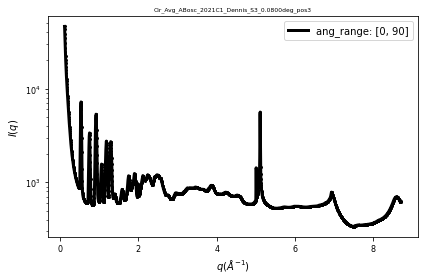

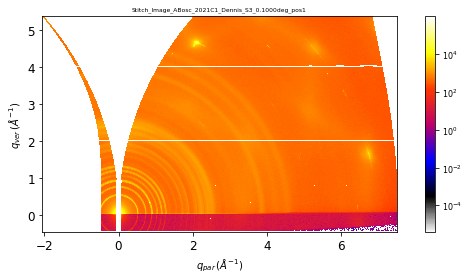

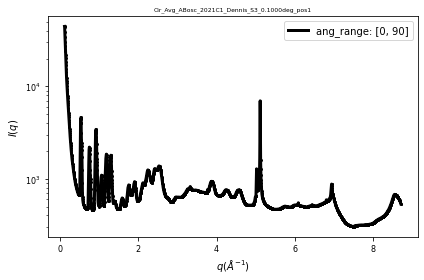

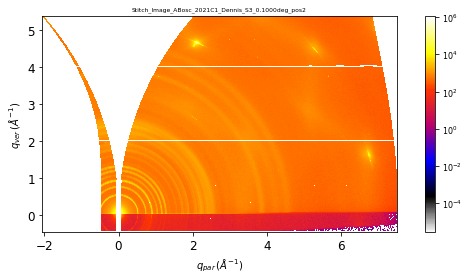

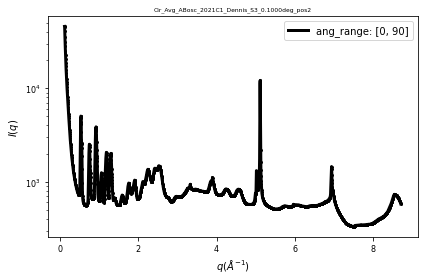

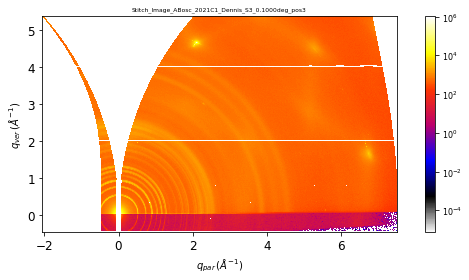

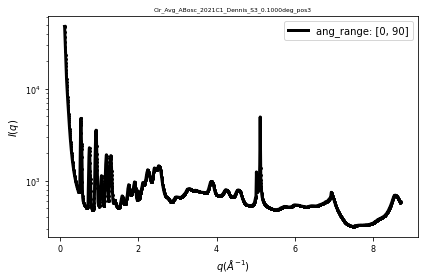

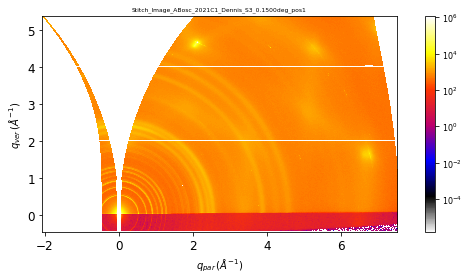

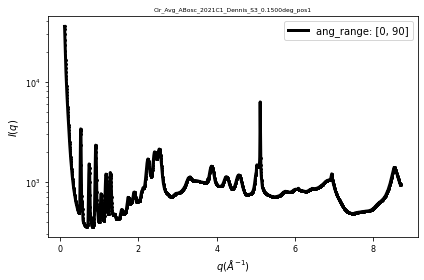

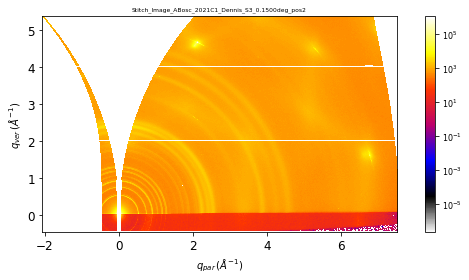

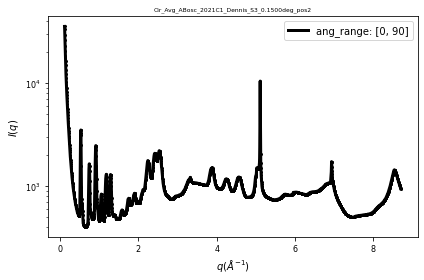

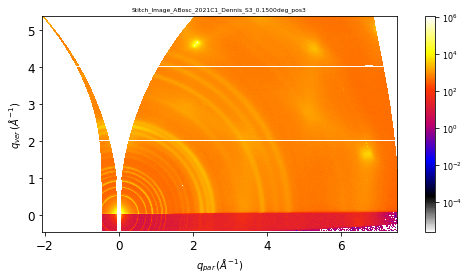

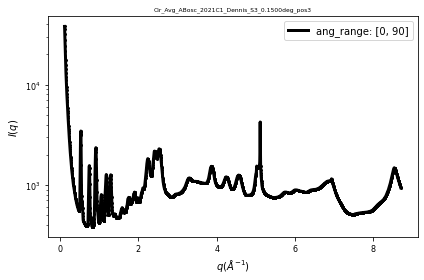

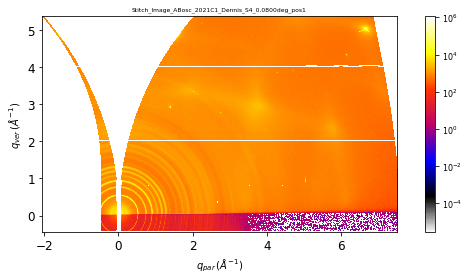

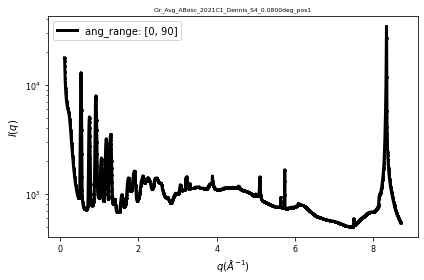

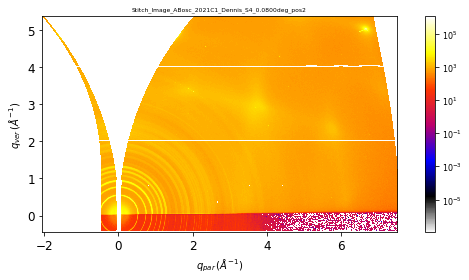

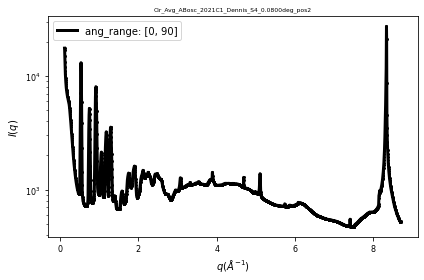

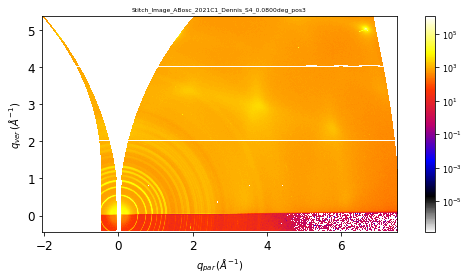

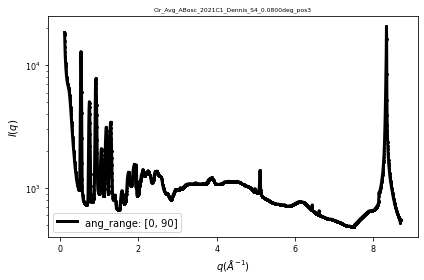

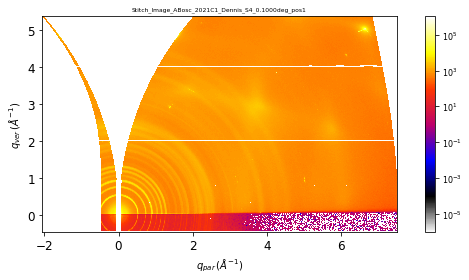

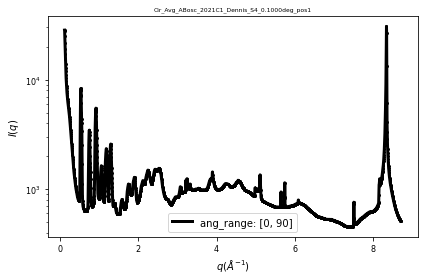

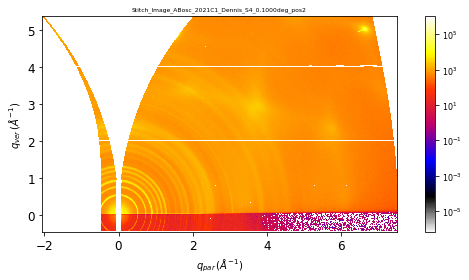

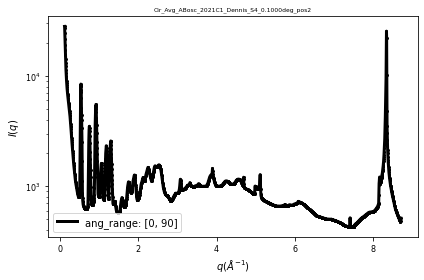

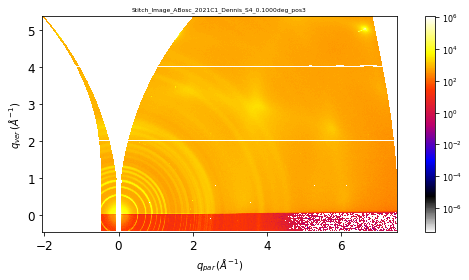

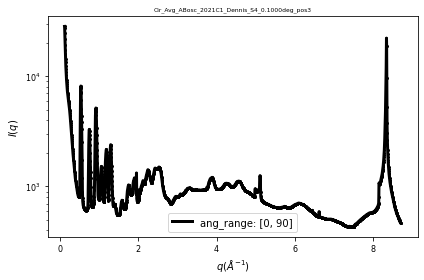

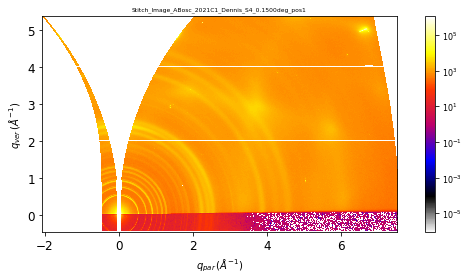

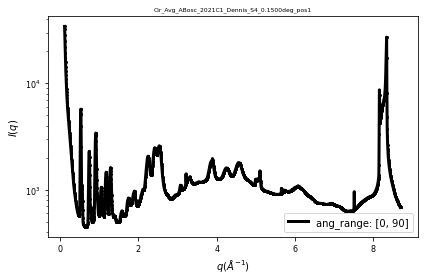

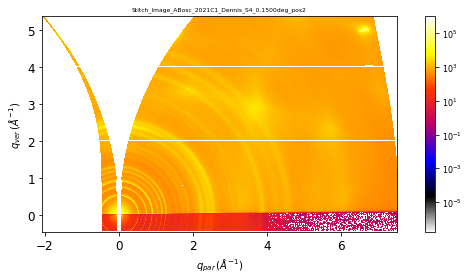

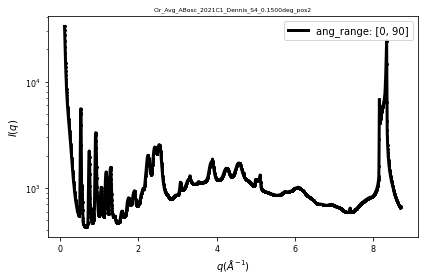

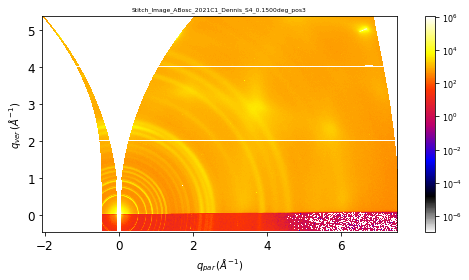

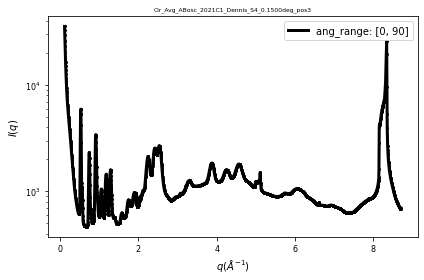

In [25]:
#loop samples
for sam in sample_list:     
    print( 'The sample is: %s.'%sam) 
    fps = Sam_dict[sam] 
    print( 'The filelist for this sample is: %s.'%fps)     
    full_filenames = [ inDir +  fp for fp in fps   ] 
    N =  len(full_filenames)        
    RES = {}
    RES['Data']={}
    PATH = 'GIWAXS'
    rot_angle = - np.arange( rot_angle_start,  rot_angle_step * N,  rot_angle_step )
    print('The rotation angles are: %s.'%rot_angle)
    pargs_sc['rotation_angles'] = rot_angle
    pargs_sc['outDir'] = create_fullpath( outDir + PATH + '/')          
    try:
        pz = float( re.search(   r'(_z)(.*)()', sam ).group()[2:]  )
    except:
        pz = 1400
    pargs_sc['sdd_mm'] = sdd_mm  - pz/1000.   
    
    p0 = re.search( r'([d][e][g])', sam  ).span()[0]
    inc = float( sam[ p0-6:p0] )
    print('The incident angle is: %s.'%inc)
    pargs_sc['incident_angle'] = inc 
        
    SC = SMI_Scattering( pargs_sc  ) 
    SC.md['sample'] = sam
    SC.load_data( full_filenames )   
    SC.saved_plots, SC.saved_data  = {}, {}    
    #######################################
    #plot the raw data
    ########################################
    if do_plot_raw:
        run_plot_raw( SC,  vmin= None, vmax=None,mask=None, fontsize=6, )        
    #######################################
    #Stitch WAXS data
    ########################################    
    SC.offset_y   =   - round( ( pz - 4250.0)/172.0,2 ) 
    
    SC.offset_y   = [28]*11
    SC.offset_y[1]   =  26
    SC.offset_y[2]   =  22    
    SC.offset_y[3]   =  20      
    SC.offset_y[4]   =  18    
    SC.offset_y[5]   =  18     
    SC.offset_y[6]   =  16    
    SC.offset_y[7]   =  14     
    SC.offset_y[8]   =  14  
    
    
    
    if check_stitch:        
        q_ch, iq_ch, int_dict_ch, qx_dict_ch, qz_dict_ch = SC.check_stitich( offset_y = SC.offset_y )  
        peaks = None 
        run_plot_waxs_check_stitch_SMI( SC, peaks =peaks,xlim= None, ylim=None,fontsize=6, ) 
    if do_stitch:        
        dq_mag = 5        
        qimg_st, msk_st, qx_st, qz_st, sca_st = SC.stitich( dq_mag = dq_mag, offset_y= SC.offset_y, flag_scale= T ) 
        
        if save_stitch_to_tiff:
            run_save_qimage( SC, dtype='qimg_st'  )         
        
        
        run_plot_qimage( SC, dtype='qimg_st', zlim=[.05, 1 ]   ) 
    else:      
    #######################################
    #Load Stitched WAXS data
    ########################################
        stitch_path = outDir + 'GIWAXS/Stitch_Data/'
        SC.qimg_st = get_img('Stitch_Data_%s.tiff'%sam, stitch_path) 
        SC.qmask_st = (SC.qimg_st != 0)
        SC.qx_st  = np.array( pds.read_csv( stitch_path + 'Stitch_Data_qx_%s.csv'%sam   )['qx_st'] )
        SC.qz_st  = np.array( pds.read_csv( stitch_path + 'Stitch_Data_qz_%s.csv'%sam   )['qz_st'] )        
    #######################################
    #Plot Stitch WAXS data
    ########################################   
    if do_plot_stich:   
        run_plot_qimage( SC, dtype='qimg_st', zlim=[.05, 1 ]   ) 
    #######################################
    #Do circular average
    ########################################  
    if do_Qciravg: 
        qz_roi_range= None
        qz_roi_range= [ 0.1,  qz_st.max() ]     
        
#         ################################
#         Thres = np.sort( np.ravel( SC.qimg_st ) )[ -ThresN ]
#         print( Thres )        
#         Mask = SC.qimg_st < Thres
#         SC.qmask_st *= Mask
#         #######################################
        
        
        qmaskn, q_ca,iq_ca,mask_ca = run_qciravg( SC, ciravg_bins=2500, Prange= [0,90], Qrange= None,
                                  qx_roi_range=None,qz_roi_range=qz_roi_range, dtype='qimg_st',    )
        run_save_ciravg(  SC  )  
        peaks = None 
        run_plot_ciravg( SC, peaks = peaks,xlim= None, ylim=None,fontsize=6, )  
        if show_Qciravg_roi:
            run_plot_qciravg_roi( SC,img_roi=SC.qimg_st*mask_ca,zlim=[.05, 1 ],fontsize=6,)  
        
    #######################################
    #Do sector circular average
    ########################################  
    if do_Qciravg_sector:  
        Prange =   [ [w-Qciravg_sector_angle_wid, w+Qciravg_sector_angle_wid] for w in  Qciravg_sector_angles  ]
        qiqs_cas,  qmask_cas = SC.qimg_circular_average_sector(SC.qimg_st , SC.qx_st, SC.qz_st,
                                    Qrange=None,Prange=Prange,bins=1500,mask= qmaskn ) 
        run_save_ciravg_sector( SC  )
        run_plot_ciravg_sector( SC, xlim=[0,8], )#ylim=[.1, 1e5]  )        
        if show_Qciravg_sector:
            run_plot_ciravg_sector_roi( SC  )    
            
    #######################################
    #Do q-phi analysis
    ########################################              
    if do_Qqphi:  
        qphi_bins = [ 500, 180 ];Prange= None;Qrange=None;            
        q_QP, phi_QP, qphi_QP, qphi_mask = SC.qimg_to_qphi(SC.qimg_st, SC.qx_st, SC.qz_st,
                                                  Qrange=Qrange,Prange=Prange,                                                      
                                                  bins=qphi_bins,mask=SC.qmask_st) 
        run_save_Qqphi( SC  )
        run_plot_Qqphi( SC,  fontsize=6, zlim=[.05, 1 ],aspect= 0.015, )
        
        if do_q_qphi:
            q_QPq,  iq_QPq = SC.qphi_to_iq( qphi_QP, q_range=q_QP, p_range=phi_QP, )
            run_save_Qqphi( SC   )
            run_plot_q_iq_qphi( SC, peaks = None, xlim= None, ylim=None,fontsize=6, )
            
        if do_p_qphi:  
            #q_range_roi = None 
            qPeak, iqPeak = find_max_peak(q_QPq,  iq_QPq, xrange=[0.1,6])
            q_range_roi = [ qPeak -.05,  qPeak + .05 ]
            p_QPp,  ip_QPp = SC.qphi_to_ip( qphi_QP, q_range=q_QP, p_range=phi_QP, Qrange=q_range_roi ) 
            run_save_q_iq_qphi( SC  )
            run_plot_p_ip_qphi( SC, peaks = None, xlim= None, ylim=None,fontsize=6, )                    
   ## save data to h5 file 
    res = SC.res_to_dict( save_raw=save_raw, do_stitch=do_stitch, 
                 do_ciravg = do_Qciravg, do_ciravg_sector = do_Qciravg_sector,
                 do_qimg=do_qimg, do_qphi = do_Qqphi,  
                do_q_qphi = do_q_qphi, do_p_qphi = do_p_qphi,                         
                        )                        
 
    RES['Data'] = res
    K='saved_data';SC.md[K] = SC.saved_data
    K='saved_plots';SC.md[K] = SC.saved_plots    
    RES['md']= SC.md  

    
    dicttoh5( RES, os.path.join(outDir_HDF, '%s.h5'%sam),
                     h5path='/%s/'%PATH, mode='a', overwrite_data=True)   
    
    
print('Done')       

        
    
    
    
    
    

# THE END

In [26]:
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering_Functions.py
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering.py
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/packages.py